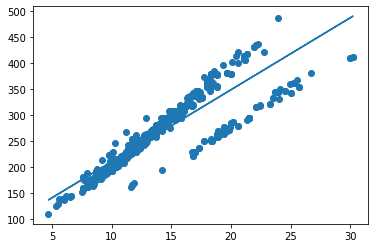

0.20829492754261633

In [49]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('FuelConsumptionCo2.csv')

x = df['FUELCONSUMPTION_CITY']
y = df['CO2EMISSIONS']


train_x = x[:700]
train_y = y[:700]

test_x = x[700:]
test_y = y[700:]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def mine(x):
    return slope * x + intercept
    
mymodel = list(map(mine, train_x))

plt.scatter(train_x, train_y)
plt.plot(train_x, mymodel)
plt.show()

In [82]:
print(mine(8.0))

182.7316984621744


In [33]:
mask = df.dtypes != np.object
col = df.columns[mask]
col2 = list(col)
col2.pop()

'CO2EMISSIONS'

In [34]:
num = df[col]
lit = df[col2]

In [56]:
from sklearn import linear_model
x = lit
y = num['CO2EMISSIONS']

train_x = x[:700]
train_y = y[:700]

test_x = x[700:]
test_y = y[700:]

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [80]:
c = test_x.loc[974]

In [81]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([c])

print(predictedCO2)

[166.33150614]


In [73]:
x= num.sample(n = 300)
y = num.drop(x.index)

In [76]:
noco_tr = y[col2]
noco_te = x[col2]

co_tr = y['CO2EMISSIONS']
co_te = x['CO2EMISSIONS']

train_x = noco_tr
train_y = co_tr

test_x = noco_te
test_y = co_te

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [87]:
c = test_x.loc[851]

In [88]:
predictedCO2 = regr.predict([c])

print(predictedCO2)

[254.69087109]


In [77]:
x

MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
665       2014         3.5          6                  12.2   
851       2014         3.5          6                  12.0   
970       2014         2.5          4                   5.5   
840       2014         2.5          4                  12.2   
974       2014         1.8          4                   8.0   
..         ...         ...        ...                   ...   
410       2014         1.6          4                   9.4   
464       2014         3.6          6                  13.9   
107       2014         4.4          8                  14.4   
696       2014         2.5          4                   9.6   
367       2014         3.5          6                  14.3   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
665                  8.7                  10.6                        27   
851                  8.9                  10.6                        27   
970                  5.9                   5.7                        50   
840                 10.2                  11.3                        25   
974                  5.9                   7.1                        40   
..                   ...                   ...                       ...   
410                  6.4                   8.1                        35   
464                  9.6                  12.0                        24   
107                  9.6                  12.2                        23   
696                  7.4                   8.6                        33   
367                 10.3                  12.5                        23   

     CO2EMISSIONS  
665           244  
851           244  
970           131  
840           260  
974           163  
..            ...  
410           186  
464           276  
107           281  
696           198  
367           288  

[300 rows x 8 columns]